Ссылка на датасет: https://www.kaggle.com/datasets/brsdincer/star-type-classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [ ]:
categorical_cols=data.select_dtypes(include=object).columns.to_list()
categorical_cols

['Color', 'Spectral_Class']

In [ ]:
data.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
data.shape

(240, 7)

In [ ]:
data.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [ ]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 240


In [ ]:
'''print('Sex: ', data['Sex'].unique())
print('BP: ', data['BP'].unique())
print('Cholesterol: ', data['Cholesterol'].unique())
print('Drug: ', data['Drug'].unique())'''

"print('Sex: ', data['Sex'].unique())\nprint('BP: ', data['BP'].unique())\nprint('Cholesterol: ', data['Cholesterol'].unique())\nprint('Drug: ', data['Drug'].unique())"

In [ ]:
'''le = LabelEncoder()
sex_data = le.fit_transform(data['Sex'])
data['Sex'] = sex_data
ch_data = le.fit_transform(data['Cholesterol'])
data['Cholesterol'] = ch_data
data['BP'] = data['BP'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})
data'''

"le = LabelEncoder()\nsex_data = le.fit_transform(data['Sex'])\ndata['Sex'] = sex_data\nch_data = le.fit_transform(data['Cholesterol'])\ndata['Cholesterol'] = ch_data\ndata['BP'] = data['BP'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})\ndata"

In [ ]:
print('Color: ', data['Color'].unique())
print('Spectral_Class: ', data['Spectral_Class'].unique())

Color:  ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Spectral_Class:  ['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [ ]:
data['Type'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
data.shape

(240, 7)

In [ ]:
new_data = pd.get_dummies(data, columns = ['Color', 'Spectral_Class'],  dummy_na=True)
new_data.head()

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_yellowish,Color_nan,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Spectral_Class_nan
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
new_data.shape

(240, 31)

In [ ]:
data = new_data.copy()

In [ ]:
data.shape

(240, 31)

In [ ]:
data.describe()

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_yellowish,Color_nan,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Spectral_Class_nan
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.0,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,0.233333,0.041667,0.016667,0.004167,0.108333,...,0.008333,0.0,0.079167,0.191667,0.070833,0.004167,0.025000,0.462500,0.166667,0.0
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,0.423836,0.200244,0.128287,0.064550,0.311450,...,0.091096,0.0,0.270563,0.394435,0.257082,0.064550,0.156451,0.499634,0.373457,0.0
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
data

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_yellowish,Color_nan,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Spectral_Class_nan
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
def class_proportions(array: np.ndarray):
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса,
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [ ]:
df = data.copy()

In [ ]:
y_df = df['Type']
df = df.drop(columns=['Type'])

In [ ]:
# разделение на объекты-признаки и целевой признак
X = df.values
y = y_df.values

In [ ]:
print_class_proportions(y)

Метка 	 Количество 	 Процент встречаемости
0 	 40 	 	 16.67%
1 	 40 	 	 16.67%
2 	 40 	 	 16.67%
3 	 40 	 	 16.67%
4 	 40 	 	 16.67%
5 	 40 	 	 16.67%


In [ ]:
print(X.shape, y.shape)

(240, 30) (240,)


In [ ]:
type(y)

numpy.ndarray

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [ ]:
# 1.Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [ ]:
# 2.Первичное обучение модели и оценка качества
cl1_1 = KNeighborsClassifier(n_neighbors=9)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.7083333333333334, 0.5208333333333334)

In [ ]:
# 3.Оценка качества модели с использованием кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=9), X, y, cv=15)
np.mean(scores)

0.6375

In [ ]:
scoring = {'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro',
           'accuracy': 'accuracy'}

In [ ]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=11),
                        X, y, scoring=scoring,
                        cv=15, return_train_score=True)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

{'fit_time': array([0.00103664, 0.00375748, 0.0006237 , 0.00057602, 0.00059557,
        0.00058842, 0.00070214, 0.00101542, 0.00114322, 0.00062656,
        0.00059509, 0.00057507, 0.00061154, 0.00062656, 0.00055289]),
 'score_time': array([0.00870538, 0.00995636, 0.00762844, 0.00810528, 0.0104444 ,
        0.00806093, 0.00784898, 0.00886488, 0.00756478, 0.0085156 ,
        0.00820351, 0.00885105, 0.01178479, 0.00742936, 0.00882912]),
 'test_precision': array([0.68333333, 0.60833333, 0.58333333, 0.51111111, 0.68055556,
        0.58333333, 0.61111111, 0.51111111, 0.72222222, 0.625     ,
        0.58333333, 0.45      , 0.76111111, 0.65      , 0.46111111]),
 'train_precision': array([0.69737125, 0.7319257 , 0.71832701, 0.70443119, 0.70402929,
        0.71444387, 0.69383494, 0.71768711, 0.70945698, 0.7101608 ,
        0.70379993, 0.72752777, 0.69133342, 0.72367292, 0.74792095]),
 'test_recall': array([0.63888889, 0.66666667, 0.58333333, 0.47222222, 0.66666667,
        0.58333333, 0.55555556

In [ ]:
for i in scores:
    print(i, np.mean(scores[i]))

fit_time 0.0009084224700927734
score_time 0.008719523747762045
test_precision 0.6016666666666666
train_precision 0.7130615419548796
test_recall 0.6055555555555556
train_recall 0.6993440809230282
test_f1 0.5661640211640211
train_f1 0.695014524881888
test_accuracy 0.6041666666666666
train_accuracy 0.699404761904762


In [ ]:
# 4.Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(3,50,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
         37, 39, 41, 43, 45, 47, 49])}]

In [ ]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=15, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

{'n_neighbors': 3}

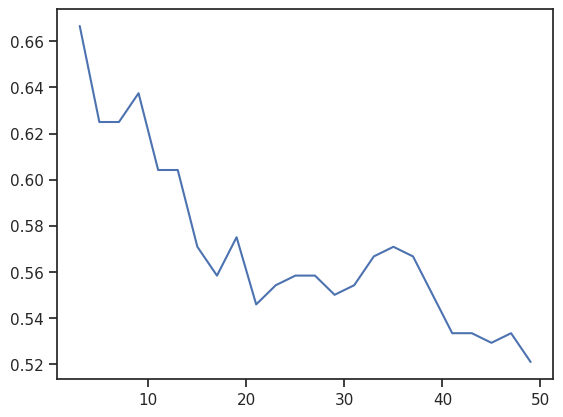

In [ ]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [ ]:
# Повторный подбор
n_range = np.array(range(3,20,1))
tuned_parameters = [{'n_neighbors': n_range}]
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=20, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

{'n_neighbors': 3}

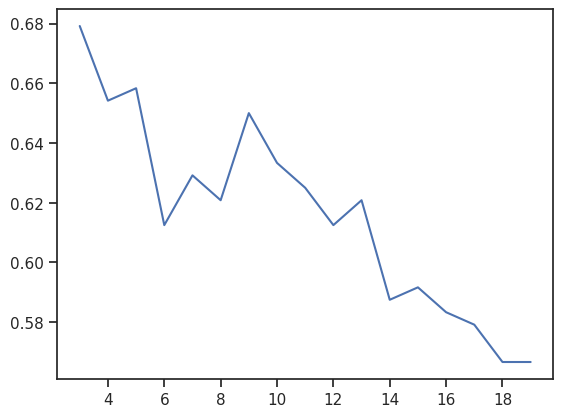

In [ ]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [ ]:
# 5.Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs.best_estimator_.fit(X_train, y_train)
target2_0 = clf_gs.best_estimator_.predict(X_train)
target2_1 = clf_gs.best_estimator_.predict(X_test)
# Новое качество модели
accuracy_score(y_train, target2_0), accuracy_score(y_test, target2_1)

(0.8489583333333334, 0.5833333333333334)

In [ ]:
# Качество модели до подбора гиперпараметров
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.7083333333333334, 0.5208333333333334)

In [ ]:
clf_gs.classes_

array([0, 1, 2, 3, 4, 5])

In [ ]:
cl1_1.classes_

array([0, 1, 2, 3, 4, 5])

In [ ]:
cm2 = confusion_matrix(y_test, target2_1, labels = clf_gs.classes_)

In [ ]:
cm1 = confusion_matrix(y_test, target1_1, labels = cl1_1.classes_)

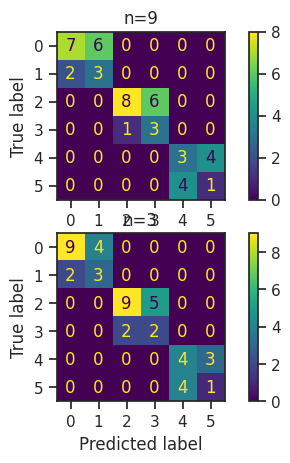

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].set_title("n=9")
ax[1].set_title("n=3")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0, 1, 2, 3, 4, 5]).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1, 2, 3, 4, 5]).plot(ax=ax[1]);

In [ ]:
n_range = np.array(range(3,50,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
         37, 39, 41, 43, 45, 47, 49])}]

In [ ]:
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=15, scoring='accuracy')
clf_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=15, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49])}],
                   scoring='accuracy')

In [ ]:
clf_rs.best_score_, clf_rs.best_params_

(0.6666666666666666, {'n_neighbors': 5})

In [ ]:
clf_rs.best_estimator_.fit(X_train, y_train)
target3_0 = clf_rs.best_estimator_.predict(X_train)
target3_1 = clf_rs.best_estimator_.predict(X_test)
# Новое качество модели
accuracy_score(y_train, target3_0), accuracy_score(y_test, target3_1)

(0.7708333333333334, 0.5416666666666666)

**K-fold**

In [ ]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3),
                         X, y, scoring='accuracy',
                         cv=kf)
scores

array([0.66666667, 0.64583333, 0.58333333, 0.66666667, 0.64583333])

In [ ]:
np.mean(scores)

0.6416666666666667

**Repeted K-fold**

In [ ]:
kf = RepeatedKFold(n_splits=5, n_repeats=2)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3),
                         X, y, scoring='accuracy',
                         cv=kf)
scores

array([0.5625    , 0.6875    , 0.60416667, 0.72916667, 0.64583333,
       0.625     , 0.66666667, 0.60416667, 0.625     , 0.6875    ])

In [ ]:
np.mean(scores)

0.64375

**Leave P Out**

In [ ]:
pkf = LeavePOut(30)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3),
                         X, y, scoring='accuracy',
                         cv=pkf)
scores

KeyboardInterrupt: 

In [ ]:
np.mean(scores)

In [ ]:
n_range = np.array(range(3,20,1))
tuned_parameters = [{'n_neighbors': n_range}]

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

{'n_neighbors': 3}

In [ ]:
rkf = RepeatedKFold(n_splits=5, n_repeats=2)

In [ ]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=rkf, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

{'n_neighbors': 3}

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
def plot_validation_curve(estimator, title, X, y,
                          param_name, param_range, cv,
                          scoring='accuracy'):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

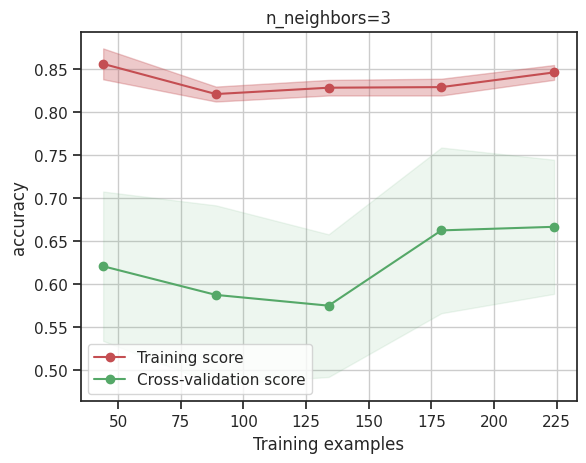

In [ ]:
# 6.Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=3', X, y, cv=15, train_sizes=np.linspace(.2, 1.0, 5))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

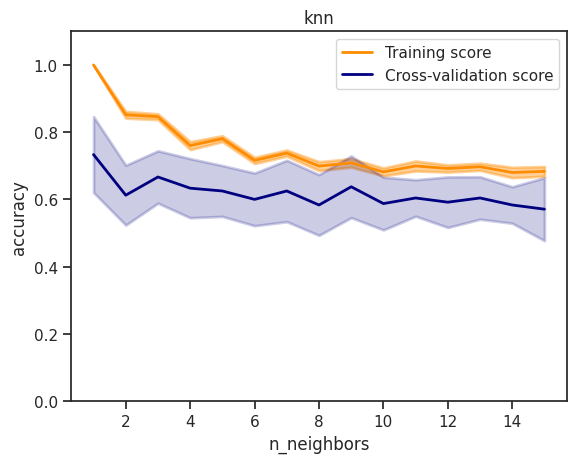

In [ ]:
n_range2 = np.array(range(1,16,1))
plot_validation_curve(clf_gs.best_estimator_, 'knn', X, y,
                      param_name='n_neighbors', param_range=n_range2,
                      cv=15, scoring="accuracy")